In [51]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


# Read in the data
df = pd.read_csv(r'C:\Users\HP\Downloads\Compressed\movies.csv')


In [52]:
# Viewing the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [41]:
# Checking if there is any missing data in the dataset
# NB: The output below shows the percenatge of missing data in each columns


for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [42]:
# Checking the data types for the data in the dataset

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [54]:
# Change data types of columns (budget&gross)
df = df.fillna(0)  #From Ln17, it is noticed that there are are missing fields in the budget and gross column
                   # so I filled the empty fields with 0 to avoid getting errors when changing data types


df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')


In [45]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,23-Oct-20,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0,23-O
7664,Dream Round,0,Comedy,2020,7-Feb-20,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,7-Fe
7665,Saving Mbango,0,Drama,2020,27-Apr-20,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0,27-A
7666,It's Just Us,0,Drama,2020,1-Oct-20,0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0,1-Oc


In [55]:
#  It is noticed that the year column doesn't match the released column in some cases. So I'm going to
#  create a correct year column and delete the old one so that there is uniformity


df['correct_year'] = df['released'].astype(str).str[:4]

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,2020-10-23,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0,2020
7664,Dream Round,0,Comedy,2020,2020-02-07,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,0,Drama,2020,2020-04-27,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0,2020
7666,It's Just Us,0,Drama,2020,2020-10-01,0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0,2020


In [90]:
# Ordering the dataset by gross column

pd.set_option('display.max_rows', 20)

df.sort_values(by=['gross'], inplace=False, ascending=False)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,533,6,0,2009,2108,7.8,1100000.0,1155,1779,2335,56,237000000,2847246203,2254,162.0,31
7445,535,6,0,2019,2864,8.4,903000.0,162,744,2242,56,356000000,2797501328,1607,181.0,41
3045,6896,6,6,1997,1225,7.8,1100000.0,1155,1779,1596,56,200000000,2201647264,2254,194.0,19
6663,5144,6,0,2015,2608,7.8,876000.0,1125,2551,525,56,245000000,2069521700,1541,138.0,37
7244,536,6,0,2018,2779,8.4,897000.0,162,744,2242,56,321000000,2048359754,1607,149.0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,7,5,1989,648,4.5,274.0,117,83,2798,56,0,0,1160,92.0,12
1614,1745,7,10,1989,588,5.2,1300.0,1033,1744,167,55,0,0,147,85.0,11
1606,2691,7,8,1989,587,6.0,2900.0,2743,947,1196,7,0,0,2238,89.0,11
1601,3836,0,4,1989,645,7.1,1500.0,1105,1697,682,19,0,0,505,104.0,12


In [91]:
# Dropping Duplicates

df.drop_duplicates

<bound method DataFrame.drop_duplicates of       name  rating  genre  year  released  score      votes  director  writer  \
0     6587       7      6  1980        25    8.4   927000.0      2589    4015   
1     5573       7      1  1980        29    5.8    65000.0      2269    1633   
2     5142       5      0  1980        26    8.7  1200000.0      1111    2568   
3      286       5      4  1980        29    7.7   221000.0      1301    2001   
4     1027       7      4  1980        33    7.3   108000.0      1054     522   
...    ...     ...    ...   ...       ...    ...        ...       ...     ...   
7663  3705       0      6  2020      2941    3.1       18.0      1500    2290   
7664  1678       0      4  2020      2924    4.7       36.0       774    2615   
7665  4717       0      6  2020      2931    5.7       29.0      2061    2684   
7666  2843       0      6  2020      2940    0.0        0.0      1184    1825   
7667  5394       0     10  2020      2935    5.7        7.0      2

<function matplotlib.pyplot.show(close=None, block=None)>

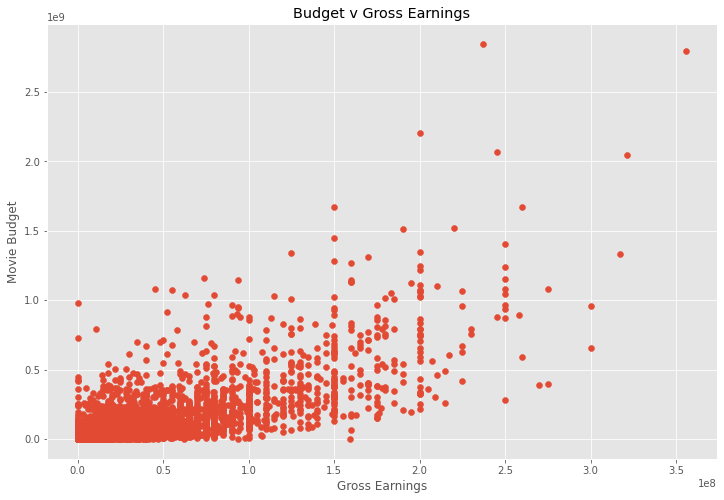

In [65]:
# Comparing the budget and the gross sales using a scatter plot

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget v Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Movie Budget')

plt.show

<AxesSubplot:xlabel='gross', ylabel='budget'>

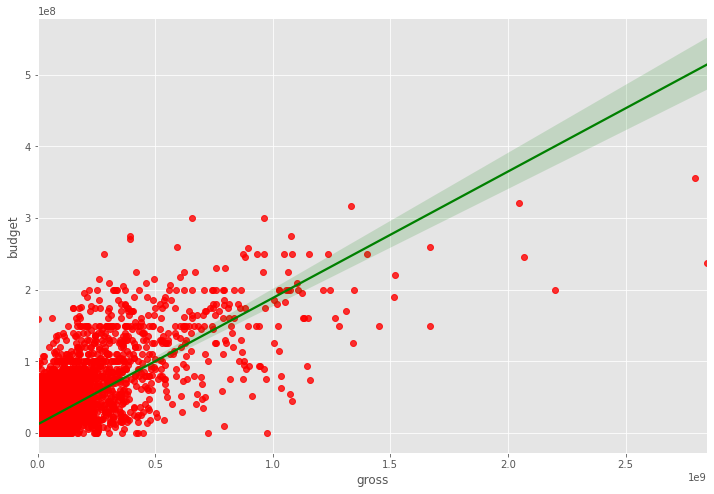

In [67]:
# Showing the correlation
sns.regplot(x="gross", y="budget", data=df, scatter_kws={"color":"red"}, line_kws={"color":"green"})

In [68]:
# Looking at the Correlations


In [70]:
df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


In [71]:
df.corr(method = 'kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.036939,0.328842,0.113255,0.219434,0.077208
score,0.036939,1.000000,0.290781,-0.093339,0.089445,0.257526
votes,0.328842,0.290781,1.000000,0.330129,0.558441,0.176314
budget,0.113255,-0.093339,0.330129,1.000000,0.513699,0.145316
gross,0.219434,0.089445,0.558441,0.513699,1.000000,0.156740
runtime,0.077208,0.257526,0.176314,0.145316,0.156740,1.000000


In [72]:
df.corr(method= 'spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097757,0.468107,0.291152,0.314681,0.141805
score,0.097757,1.000000,0.428810,-0.007002,0.133564,0.399868
votes,0.468107,0.428810,1.000000,0.604693,0.752550,0.289359
budget,0.291152,-0.007002,0.604693,1.000000,0.716816,0.246941
gross,0.314681,0.133564,0.752550,0.716816,1.000000,0.257478
runtime,0.141805,0.399868,0.289359,0.246941,0.257478,1.000000


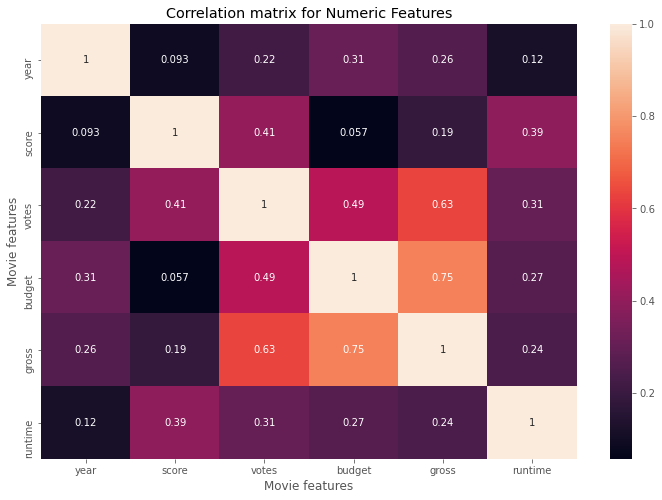

In [73]:
# Visualizing the Correlation Matrix

correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [86]:
#Numerizing the dataset

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] =  df_numerized[col_name].astype('category')
        df_numerized[col_name] =  df_numerized[col_name].cat.codes
        
df_numerized.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,6587,7,6,1980,25,8.4,927000.0,2589,4015,1048,55,19000000,46998772,2320,146.0,2
1,5573,7,1,1980,29,5.8,65000.0,2269,1633,328,56,4500000,58853106,732,104.0,2
2,5142,5,0,1980,26,8.7,1200000.0,1111,2568,1746,56,18000000,538375067,1541,124.0,2
3,286,5,4,1980,29,7.7,221000.0,1301,2001,2247,56,3500000,83453539,1813,88.0,2
4,1027,7,4,1980,33,7.3,108000.0,1054,522,411,56,6000000,39846344,1778,98.0,2
5,2109,7,10,1980,19,6.4,123000.0,2528,4363,242,56,550000,39754601,1813,95.0,2
6,5574,7,0,1980,26,7.9,188000.0,1412,839,1278,56,27000000,115229890,2282,133.0,2
7,4436,7,3,1980,50,8.2,330000.0,1829,1770,2241,56,18000000,23402427,632,129.0,2
8,5281,5,0,1980,75,6.8,101000.0,2306,1980,878,56,54000000,108185706,884,127.0,3
9,6213,7,3,1980,20,7.0,10000.0,2864,424,590,56,10000000,15795189,2273,100.0,2


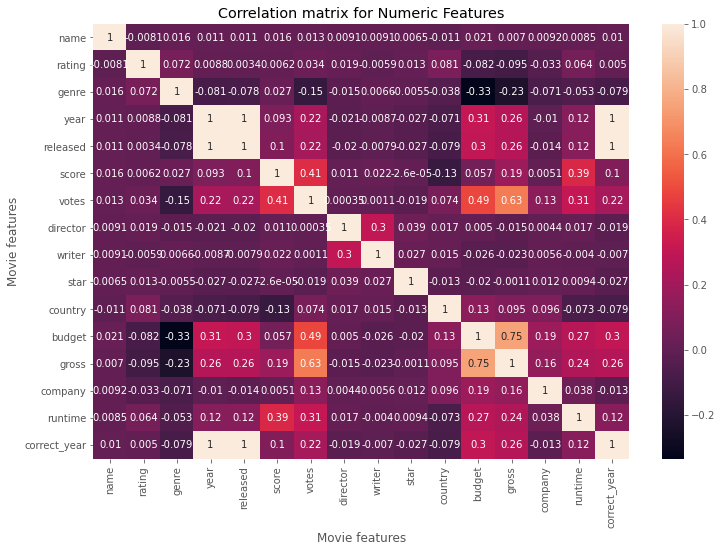

In [78]:
# Visualizing the Correlation Matrix

correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [79]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
name,1.000000,-0.008069,0.016355,0.011453,0.010724,0.016377,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483,0.009976
rating,-0.008069,1.000000,0.072423,0.008779,0.003408,0.006192,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133,0.005049
genre,0.016355,0.072423,1.000000,-0.081261,-0.078483,0.027384,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914,-0.079161
year,0.011453,0.008779,-0.081261,1.000000,0.995257,0.092616,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.116358,0.995132
released,0.010724,0.003408,-0.078483,0.995257,1.000000,0.101846,0.217907,-0.020091,-0.007890,-0.026720,-0.079196,0.300483,0.257159,-0.014124,0.122553,0.999320
score,0.016377,0.006192,0.027384,0.092616,0.101846,1.000000,0.407101,0.010568,0.022098,-0.000026,-0.133346,0.056863,0.186012,0.005081,0.394564,0.100553
votes,0.013038,0.033743,-0.145296,0.222427,0.217907,0.407101,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.306984,0.218111
director,0.009079,0.019483,-0.015258,-0.020795,-0.020091,0.010568,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062,-0.019079
writer,0.009081,-0.005921,0.006567,-0.008656,-0.007890,0.022098,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036,-0.007038
star,0.006472,0.013405,-0.005477,-0.027242,-0.026720,-0.000026,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418,-0.026895


In [85]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released        0.010724
              score           0.016377
              votes           0.013038
              director        0.009079
              writer          0.009081
              star            0.006472
              country        -0.010737
              budget          0.020548
              gross           0.006989
              company         0.009211
              runtime         0.008483
              correct_year    0.009976
rating        name           -0.008069
              rating          1.000000
              genre           0.072423
              year            0.008779
              released        0.003408
              score           0.006192
              votes           0.033743
              director        0.019483
              writer         -0.005921
              star       

In [83]:
sorted_pairs = corr_pairs.sort_values()


sorted_pairs.head(10)

budget   genre     -0.334021
genre    budget    -0.334021
         gross     -0.234297
gross    genre     -0.234297
votes    genre     -0.145296
genre    votes     -0.145296
score    country   -0.133346
country  score     -0.133346
gross    rating    -0.095450
rating   gross     -0.095450
dtype: float64

In [82]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross         votes           0.632870
votes         gross           0.632870
gross         budget          0.750157
budget        gross           0.750157
year          correct_year    0.995132
correct_year  year            0.995132
released      year            0.995257
year          released        0.995257
released      correct_year    0.999320
correct_year  released        0.999320
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct_year  correct_yea

In [ ]:
# From the analysis, the Budget amd Voting can be said to have the highest correlations while Company has a low correlation